<a href="https://colab.research.google.com/github/akshatshah91/Game-AI/blob/master/HW3_Q_learning_vs_SARSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
alpha = 0.1
gamma = 0.5
epsilon = 0.1
episodes = 50000
tests = 10

In [3]:
def getAction(s,q,env,e):
  a = None
  if random.uniform(0,1) < e:
    a = env.action_space.sample()
  else:
    a = np.argmax(q[s,:])
  return a

In [16]:
def trainQ(env, q, fixedAlpha=True):
  s = env.reset()
  q = np.zeros((env.observation_space.n,env.action_space.n))
  alpha = 0.1
  for x in range(1, episodes+1):
    s = env.reset()
    gameOver = False
    if not fixedAlpha:
      alpha = 1/x
    while not gameOver:
      a = getAction(s,q,env,epsilon)
      sNew,r,gameOver,_ = env.step(a)
      q[s,a] += alpha*(r + gamma*np.max(q[sNew,:]) - q[s,a])
      s = sNew
  return q

In [17]:
def trainSARSA(env, q, fixedAlpha=True):
  s = env.reset()
  q = np.zeros((env.observation_space.n,env.action_space.n))
  alpha = 0.1
  for x in range(1,episodes+1):
    s = env.reset()
    gameOver = False
    if not fixedAlpha:
      alpha = 1/x
    a = getAction(s,q,env,epsilon)
    while not gameOver:
      sNew,r,gameOver,_ = env.step(a)
      aNew = getAction(sNew,q,env,epsilon)
      q[s,a] += alpha*(r + gamma*q[sNew,aNew] - q[s,a])
      s = sNew
      a = aNew
  return q

In [5]:
def test(env,q):
  rewards = []
  for x in range(1,tests+1):
    s = env.reset()
    reward = 0
    gameOver = False
    while not gameOver:
      a = np.argmax(q[s,:])
      s,r,gameOver,_ = env.step(a)
      reward += r
    rewards.append(reward)
  return rewards

Q-Learning with fixed alpha
[11, 11, 8, 5, 14, 3, 9, 6, 5, 7] 

Q-Learning with dynamic alpha
[-200, -200, -200, -200, -200, -200, -200, -200, -200, -200] 

SARSA with fixed alpha
[-200, -200, -200, 10, 6, -200, -200, -200, -200, -200] 

SARSA with dynamic alpha
[-200, 9, 13, -200, -200, 7, 7, 11, -200, -200] 



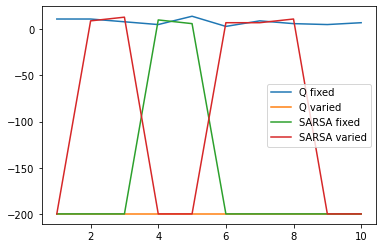

In [18]:
q = None
env = gym.make("Taxi-v3")
x = [1,2,3,4,5,6,7,8,9,10]

print("Q-Learning with fixed alpha")
q = trainQ(env,q)
r1 = test(env,q)
plt.plot(x,r1,label = "Q fixed")
print(r1,"\n")

print("Q-Learning with dynamic alpha")
q = trainQ(env,q,False)
r2 = test(env,q)
plt.plot(x,r2,label = "Q varied")
print(r2,"\n")

print("SARSA with fixed alpha")
q = trainSARSA(env,q)
r3 = test(env,q)
plt.plot(x,r3,label = "SARSA fixed")
print(r3,"\n")

print("SARSA with dynamic alpha")
trainSARSA(env,q,False)
q = r4 = test(env,q)
plt.plot(x,r4,label = "SARSA varied")
print(r4,"\n")

plt.legend()
plt.show()

The base alpha I am using is 0.1. For the dynamic test, my alpha is 1/x where x is the episode. This means that my alpha decreases quickly at first but slows down later. Also, the later training does not have as large an impact on the q table as the initial episodes. Before running the tests, I predict that regular q learning with fixed alpha will work best. SARSA only uses the values it has gotten by moving whereas q learning uses the best possible q value. I think this will work better, especially since there are no traps end states that guarantee a negative final reward. Also, there are so many different starting states so the dynamic alpha will not work as well because it will update some of the states quickly but then some states not achieved in the first few episodes will only update slowly.

After running the experiment I see that my prediction was correct. Q learning with a fixed alpha worked best and most consistently. It seems like Q learning with varied alpha did not work at all since during the test runs it achieved a score of -200. Also, SARSA did not seem to work as well as regular Q learning, however, the varied alpha SARSA worked better than the varied alpha Q learning. There are some games that SARSA would work better than Q learning, and varied alpha would be vastly superior to fixed, but I think in the taxi environment, the added complexity is detrimental to the AI's performance.